# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [137]:
! git clone https://github.com/NickLarsonUVA/scratchpad
%run ./scratchpad/get_data.py

fatal: destination path 'scratchpad' already exists and is not an empty directory.


<Figure size 640x480 with 0 Axes>

In [138]:
import seaborn as sns
import numpy as np
import pandas as pd

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [139]:
#1
df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='latin1')
#df.head() # once price hits 4 digits it has comma, need to get rid
df['Price_clean'] = (df['Price'].str.replace(',', '', regex=False)) #replace comma
df['Price_clean'] = pd.to_numeric(df['Price_clean'], errors='coerce') #change to numeric
print(df['Price_clean'].describe())
#df['Price_clean'].value_counts()
df['Price_clean'].isna().sum()
# After removing commas and converting the variable to
# numeric with errors='coerce', no values were dropped.


count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price_clean, dtype: float64


np.int64(0)

In [140]:
#2
df = pd.read_csv('/content/data/mn_police_use_of_force.csv')
#show that there are more missing than Yes / No
df['subject_injury'].value_counts(dropna=False)
df['subject_injury_clean'] = df['subject_injury']
df['subject_injury_clean'].isna().mean()
pd.crosstab(df['force_type'], df['subject_injury_clean'], dropna=False, normalize='index')
#cross tabulating allows to see what type of force has the most missing
#can see patterns with the types: much more common for less lethal force types
#(like Chemical Irritant, Taser, Bodily Force) and rare for clearly defined uses
#(like Firearm) suggesting that missingness is not random and depends on the type of force used.


subject_injury_clean,No,Yes,NaN
force_type,,,
Baton,0.000000,0.500000,0.500000
Bodily Force,0.115907,0.136373,0.747720
Chemical Irritant,0.082235,0.025738,0.892028
Firearm,1.000000,0.000000,0.000000
Gun Point Display,0.317308,0.423077,0.259615
Improvised Weapon,0.229730,0.270270,0.500000
Less Lethal,0.000000,0.000000,1.000000
Less Lethal Projectile,0.333333,0.666667,0.000000
Maximal Restraint Technique,0.000000,0.000000,1.000000


In [141]:
#2 continued
df['subject_injury_final'] = df['subject_injury_clean'].fillna('Missing') # replaces with missing
df['subject_injury_final'].value_counts() # shows new missing values

,count
subject_injury_final,
Missing,9848
Yes,1631
No,1446


In [142]:
#3
df = pd.read_csv('/content/data/metabric.csv')
df['Overall Survival Status'].value_counts() #shows titles for below also
# create mapping dictionary, replaces string with number
df['OS_dummy'] = df['Overall Survival Status'].map({'1:DECEASED': 0, '0:LIVING': 1})
df['OS_dummy'].value_counts()

,count
OS_dummy,
0,768
1,575


In [143]:
#4
df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='latin1')
df['Review Scores Rating'].describe()
df['Review Scores Rating'].isna().sum() #8323 missing
df['Review Scores Rating_final'] = df['Review Scores Rating'].fillna(df['Review Scores Rating'].median())
# replaces all missing values (NaN) in Review Scores Rating with the median of the non-missing ratings
#df[['Review Scores Rating', 'Review Scores Rating_final']].head(10) #comparing
df[['Review Scores Rating', 'Review Scores Rating_final']].describe()
# can see from this that the values like mean change 91.99 - 92.54, sd changed 8.85 - 7.60
# showing that replacing missing values reduces variability and shifts the distribution upward in this case

,Review Scores Rating,Review Scores Rating_final
count,22155.000000,30478.000000
mean,91.993230,92.541243
std,8.850373,7.598524
min,20.000000,20.000000
25%,89.000000,90.000000
50%,94.000000,94.000000
75%,100.000000,97.000000
max,100.000000,100.000000


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [156]:
#Q2 - 1
df = pd.read_excel("/content/GSAF5.xls") #have to use read_excel
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,...,5m shark species not determined,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
#Q2 - 2
df = df.drop(columns= ['pdf', 'href formula', 'href', 'Case Number.1', 'Case Number', 'original order', 'Unnamed: 22', 'Unnamed: 21'])
df.head() # drop all of the columns that had NaN

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,Minor cuts and abrasions,N,0830hrs,Bull shark,Bob Myatt GSAF
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,None reported damage to board,N,1145hrs,Bull shark,Andy Currie
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,Serious Leg injuries,N,1820hrs,5m shark species not determined,9 News: Bob Myatt GSAF
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,Serious leg injuries,Y,1620hrs,Bull shark,Bob Myatt GSAF
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,Puncture mark to left thumb,N,0540hrs,Unknown,Bob Myatt GSAF


In [146]:
# Q2 - 3
# Each row in this dataset represents a single shark attack incident.
# This means we treat each attack as its own observation when cleaning and analyzing the data.

Year
1940.0     24
1941.0     27
1942.0     41
1943.0     28
1944.0     31
         ... 
2022.0     98
2023.0    109
2024.0     52
2025.0     66
2026.0      8
Length: 87, dtype: int64


<Axes: title={'center': 'Shark Attacks per Year Since 1940'}, xlabel='Year'>

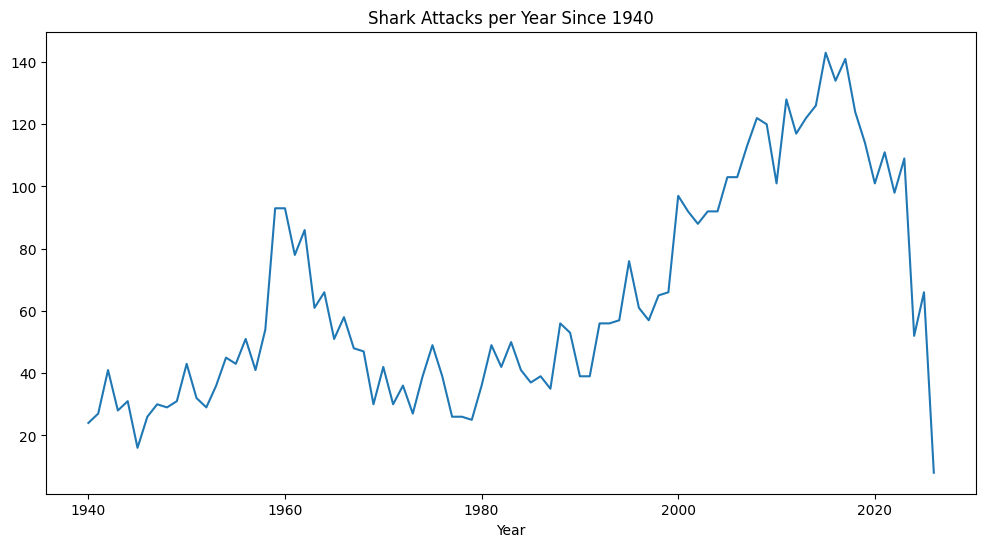

In [158]:
# Q2 - 4
df['Year'].value_counts()
df['Year'].describe() #gives range of years, 0 - 2026
df['Year'].isna().sum() # missing year values = 2
df_1940 = df[df['Year'] >= 1940] # filters to attacks since 1940
yearly_counts = df_1940.groupby('Year').size() #counts attacks per year
print(yearly_counts)
yearly_counts.plot(kind='line', title='Shark Attacks per Year Since 1940', figsize=(12,6))
#plot to show the trends
# shark attacks fluctuate, steadily has been increasing with some dips, except recent with 2026 which doesn't
# have its full data yet

count    3923.000000
mean       28.176396
std        14.678068
min         1.000000
25%        17.000000
50%        24.000000
75%        37.000000
max        87.000000
Name: Age, dtype: float64


<Axes: xlabel='Age', ylabel='Count'>

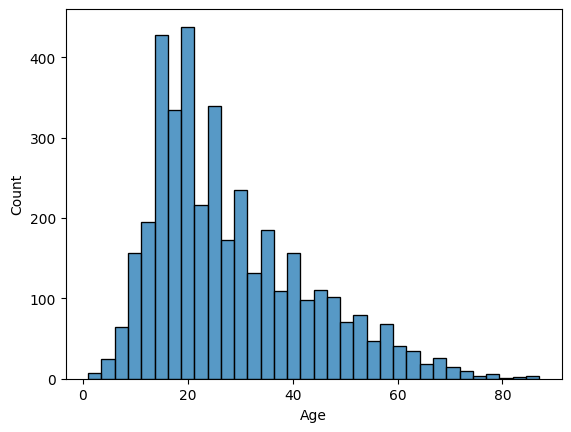

In [163]:
#Q2 - 5
df['Age'].value_counts()
#print("Missing Age values:", df['Age'].isna().sum()) #2995 missing age values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # clean to numeric
print(df['Age'].describe())  # see min, max, mean, quartiles

sns.histplot(df['Age'])

In [149]:
#Q2 - 6
df['Type'].value_counts() #shows lots of different types
df['Type_clean'] = df['Type']
df['Type_clean'] = df['Type'].str.strip().str.capitalize()  # normalizes capatilization, strip space
df['Type_clean'] = df['Type_clean'].where(df['Type_clean'].isin(['Provoked','Unprovoked']), 'Unknown')
# Keep only 'Provoked' and 'Unprovoked', everything else becomes 'Unknown'
print(df['Type_clean'].value_counts())
prop_unprovoked = (df['Type_clean'] == 'Unprovoked').mean() # boolean of true / false, mean gives proportion of true values
print(f"Proportion of unprovoked attacks: {prop_unprovoked:.2%}") #puts into percentage

Type_clean
Unprovoked    5222
Unknown       1204
Provoked       644
Name: count, dtype: int64
Proportion of unprovoked attacks: 73.86%


In [150]:
#Q2 - 7
df['Fatal Y/N'].value_counts() #lots of random besides Y/N
df['Fatal YN_clean'] = df['Fatal Y/N'].str.strip().str.capitalize() #normalizes capitalization, strip space
df['Fatal YN_clean'] = df['Fatal YN_clean'].where(df['Fatal YN_clean'].isin(['Y','N']), 'Unknown')
# Keep only 'Y' and 'N', everything else becomes 'Unknown'
print(df['Fatal YN_clean'].value_counts())

Fatal YN_clean
N          4939
Y          1488
Unknown     643
Name: count, dtype: int64


In [151]:
#Q2 - 8
# Compare fatality by attack type
fatal_by_type = pd.crosstab(df['Type_clean'], df['Fatal YN_clean'], normalize='index') * 100
fatal_by_type # do another cross tab to help aid in answering
# Unprovoked attacks are much more likely to be fatal than provoked attacks (about 24% vs 3%).
# This makes sense because unprovoked attacks happen naturally in the water, where sharks may
# be hunting or reacting defensively, while provoked attacks usually occur when humans interact with or disturb the shark.

Fatal YN_clean,N,Unknown,Y
Type_clean,,,
Provoked,95.341615,1.397516,3.260870
Unknown,37.292359,46.096346,16.611296
Unprovoked,74.224435,1.512830,24.262735


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. **Read the abstract. What is this paper about?**
  The abstract explains that this paper tackles data tidying. It's about structuring datasets in a specific way (each variable is a column, each observation is a row, each type of observational unit is a table) to make data manipulation, modeling, and visualization easier.
---
  2. **Read the introduction. What is the "tidy data standard" intended to accomplish?** The tidy data standard is meant to make initial data cleaning easier because you don't have to redo it every time. It's designed to facilitate initial exploration and analysis, and to simplify developing data analysis tools that work well together. Then you don't have to spend time transfering from one tool to input it into another.
---
  3. **Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general.**
  The first sentence (borrowing from Tolstoy) means that all tidy datasets follow the same structure, but messy datasets can be messy in countless different ways. There's no single pattern to messiness.
  The second sentence means that when you're looking at a specific dataset, it's usually pretty obvious what counts as an observation vs. a variable. But if you try to write a precise, universal definition that works for ALL datasets, it gets more tricky.
---
  4. **Read Section 2.2. How does Wickham define values, variables, and observations?**
  - Values: Either numbers (quantitative) or strings (qualitative)
  - Variable: Contains all values that measure the same underlying attribute (like height, temperature, duration) across units
  - Observation: Contains all values measured on the same unit (like a person, day, or race) across attributes
---
  5. **How is "Tidy Data" defined in section 2.3?**
  Tidy data has three characteristics:
  -  Each variable forms a column
  - Each observation forms a row
  - Each type of observational unit forms a table
---
  6. **Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?**
  The 5 most common problems are:
  - Column headers are values, not variable names, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, a single observational unit is stored in multiple tables

  - Table 4 is messy because the column headers (<$10k, $10-20k, etc.) are actually *values* of an income variable, not variable names themselves."Melting" (or stacking) means turning columns into rows. You keep certain columns as they are, then convert the other column headers into a new variable called "column" and stack all their values into a new variable called "value."
---
  7. **Why, specifically, is table 11 messy but table 12 tidy and "molten"?** Table 11 is messy because: It has variables spread across columns (d1-d31 for days) and it has variables stored in rows (tmin and tmax are in the "element" column rather than being separate columns)
  Table 12b is tidy because after melting and casting each variable (id, date, tmax, tmin) has its own column, each row represents a single day's observations and there's one variable per column, not variable names stored as values

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [166]:
# Q4 - 1
df = pd.read_csv('/content/data/ForeignGifts_edu.csv')
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

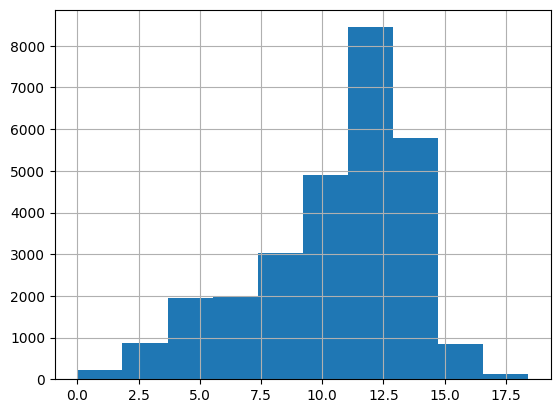

In [175]:
# Q4 - 2
print(df['Foreign Gift Amount'].describe())
df['gift_ln'] = np.log(df['Foreign Gift Amount'])
df['gift_ln'].hist() #turned it into log to look at it easier

#Most foreign gifts are relatively small (median ≈ $94,615), but a few extremely large donations, up to $100 million, make the distribution highly skewed.

In [178]:
# Q4 - 3
gift_counts = df['Gift Type'].value_counts()
print(gift_counts)
# Proportion of each type
gift_props = df['Gift Type'].value_counts(normalize=True)
print(gift_props) #61% contract, 39% monetary, <.01% real estate

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


In [186]:
# Q4 - 4
# number of gifts
top_countries_count = df['Country of Giftor'].value_counts().head(15)
print(top_countries_count)

# amount given
top_countries_sum = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)
print('Top spenders:', top_countries_sum)

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64
Top spenders: Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


<Axes: title={'center': 'Top Institutions by Total Gift Amount'}, xlabel='Institution Name'>

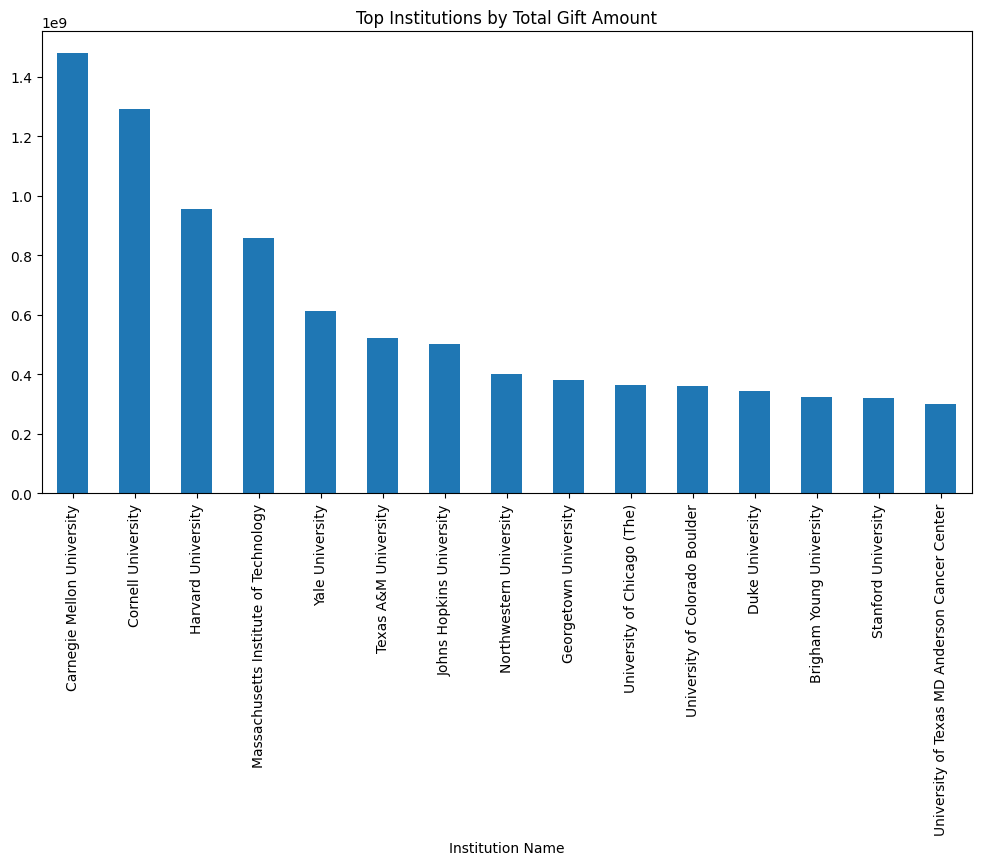

In [209]:
# Q4 - 5
top_institutions = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_institutions)
top_institutions.plot(kind='bar', title='Top Institutions by Total Gift Amount', figsize=(12,6)) #bar graph looks better than histogram

In [205]:
# Q4 - 6
top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(5)
print(top_giftors) #these are the top giftors

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
Name: Foreign Gift Amount, dtype: int64


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [215]:
# Q5 - 1
df = pd.read_csv('/content/data/college_completion.csv')

In [216]:
# Q5 - 2
print(df.shape)
df.head(2)
# Observations: 7,429
# Variables: 63

(3798, 63)


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0


In [218]:
# Q5 - 3
cross_tab = pd.crosstab(df['control'], df['level'])
print(cross_tab)
# Most 4-year programs are private non-profit, most 2-year programs are public, and private for-profit schools are fairly evenly split between 2- and 4-year.

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


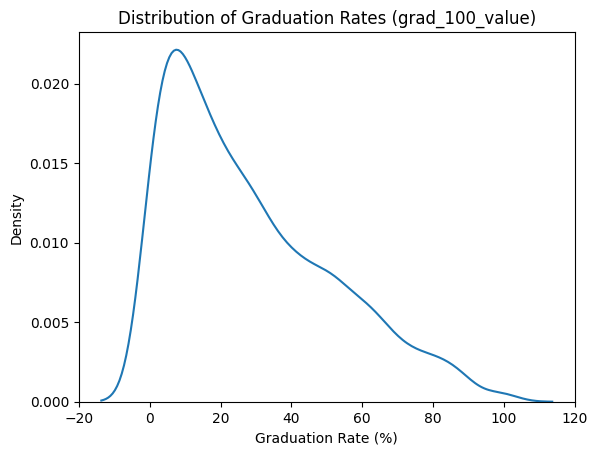

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


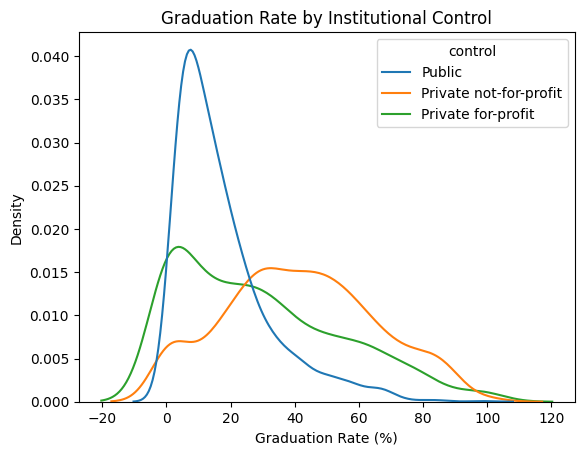


Statistics for Public institutions:
count    1499.000000
mean       17.430887
std        14.729443
min         0.000000
25%         6.900000
50%        13.200000
75%        23.250000
max        97.800000
Name: grad_100_value, dtype: float64

Statistics for Private not-for-profit institutions:
count    1189.000000
mean       41.660976
std        23.551231
min         0.000000
25%        25.000000
50%        41.000000
75%        58.300000
max       100.000000
Name: grad_100_value, dtype: float64

Statistics for Private for-profit institutions:
count    779.000000
mean      29.108858
std       25.601687
min        0.000000
25%        6.950000
50%       24.700000
75%       46.750000
max      100.000000
Name: grad_100_value, dtype: float64


In [228]:
# Q5 - 4
# Overall KDE plot
sns.kdeplot(df['grad_100_value'].dropna())
plt.xlabel('Graduation Rate (%)')
plt.title('Distribution of Graduation Rates (grad_100_value)')
plt.show()
# Summary statistics
print(df['grad_100_value'].describe())

# condition on control
# KDE plot by institutional control
sns.kdeplot(data=df, x='grad_100_value', hue='control', common_norm=False)
plt.xlabel('Graduation Rate (%)')
plt.title('Graduation Rate by Institutional Control')
plt.show()
# Statistics by control
for c in df['control'].unique():
    print(f"\nStatistics for {c} institutions:")
    print(df[df['control']==c]['grad_100_value'].describe())


# Answer which type has most favorable graduation rates
# Private not-for-profit institutions appear to have the most favorable graduation rates.

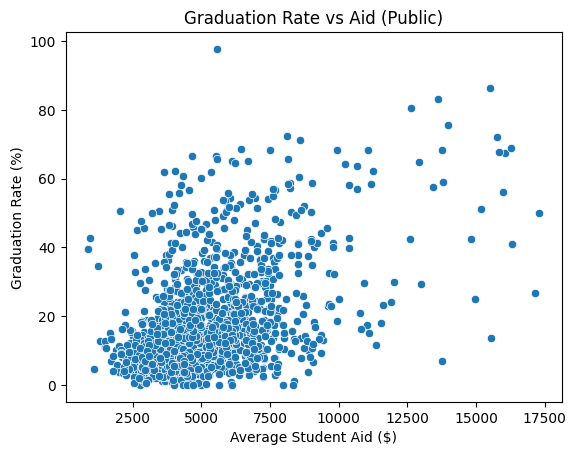

Public institutions - covariance: 15355.15, correlation: 0.48
Observation: Aid tends to increase with graduation rates for Public institutions.



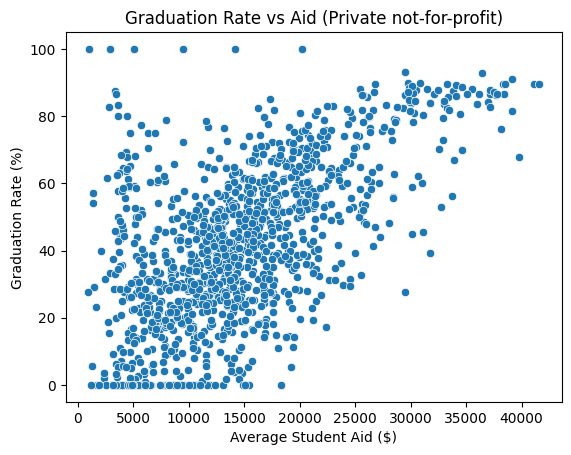

Private not-for-profit institutions - covariance: 109274.12, correlation: 0.60
Observation: Aid tends to increase with graduation rates for Private not-for-profit institutions.



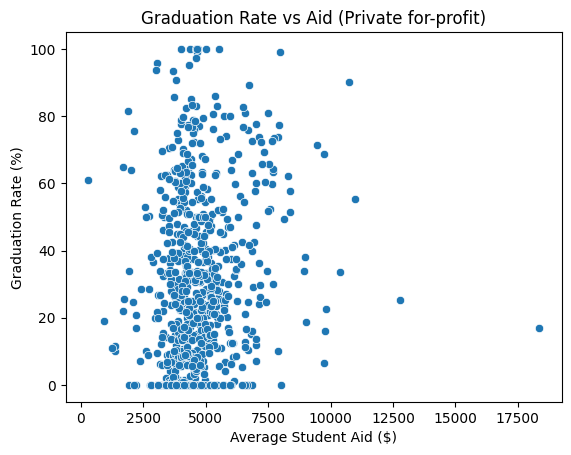

Private for-profit institutions - covariance: 6897.52, correlation: 0.19
Observation: Aid has little or no positive association with graduation rates for Private for-profit institutions.



In [229]:
# Q5 - 5
# Step 5b: Scatterplots and correlation by institutional control
controls = df['control'].unique()

for c in controls:
    sub = df[df['control'] == c]

    # Scatterplot
    sns.scatterplot(data=sub, x='aid_value', y='grad_100_value')
    plt.xlabel('Average Student Aid ($)')
    plt.ylabel('Graduation Rate (%)')
    plt.title(f'Graduation Rate vs Aid ({c})')
    plt.show()

# can see that the first two graphs have some correlation but it looks like the last doesn't

    # Covariance and correlation
    cov = sub[['grad_100_value', 'aid_value']].cov().iloc[0,1]
    corr = sub[['grad_100_value', 'aid_value']].corr().iloc[0,1]
    print(f"{c} institutions - covariance: {cov:.2f}, correlation: {corr:.2f}")

    # Observation
    if corr > 0.2:
        print(f"Observation: Aid tends to increase with graduation rates for {c} institutions.\n")
    else:
        print(f"Observation: Aid has little or no positive association with graduation rates for {c} institutions.\n")

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?